<h1><center>Hotel Booking EDA</center></h1>


<img src= "https://1.bp.blogspot.com/-EOGSCZK5AEI/T2sQyrP5t9I/AAAAAAAASjg/DiihuR_6gx0/s1600/Lisboa-Portugal-.jpg" alt ="Lisboa" style='width: 400px;'>


# Introduction

Managing a hotel business is not a simple task. In order to improve billing, the manager must be aware of the most diverse aspects in order to provide to his customers a good service. 

In this notebook will be analyzed a booking information of an City Hotel and a Resort Hotel in period of July 2015 to October 2017. Both hotels located in Portugal, City Hotel in Lisboa, capital of Portugal and Resort Hotel in Algarve, a coastal town. 

We will study aspects such as price variation, number of guests per season, length of stay, cancellation of bookings, etc.

# Data Treating


First of all we need to prepeare our database. We need to working on, missing values, unexpected values, variable types, visualization aspects, etc.

In [73]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("display.max_columns", 34)

data =  pd.read_csv('hotel_bookings.csv')

In [74]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.00,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.00,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.00,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.00,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.00,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.00,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.00,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.00,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.00,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [75]:
data.shape

(119390, 32)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [77]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [78]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,"119,390.00",0.37,0.48,0.00,0.00,0.00,1.00,1.00
lead_time,"119,390.00",104.01,106.86,0.00,18.00,69.00,160.00,737.00
arrival_date_year,"119,390.00","2,016.16",0.71,"2,015.00","2,016.00","2,016.00","2,017.00","2,017.00"
arrival_date_week_number,"119,390.00",27.17,13.61,1.00,16.00,28.00,38.00,53.00
arrival_date_day_of_month,"119,390.00",15.80,8.78,1.00,8.00,16.00,23.00,31.00
stays_in_weekend_nights,"119,390.00",0.93,1.00,0.00,0.00,1.00,2.00,19.00
stays_in_week_nights,"119,390.00",2.50,1.91,0.00,1.00,2.00,3.00,50.00
adults,"119,390.00",1.86,0.58,0.00,2.00,2.00,2.00,55.00
children,"119,386.00",0.10,0.40,0.00,0.00,0.00,0.00,10.00
babies,"119,390.00",0.01,0.10,0.00,0.00,0.00,0.00,10.00


In order to make our dataframe more aesthetically pleasing, we will change the name of columns.

In [79]:
data.columns = ['Hotel', 'Canceled', 'Lead Time', 'Arriving Year', 'Arriving Month', 'Arriving Week','Arriving Date', 'Weekend Stay',
              'Week Stay', 'Adults', 'Children', 'Babies', 'Meal','Country', 'Segment', 'Dist Channel','Repeat Guest', 'Prev Cancel',
              'Prev Book', 'Book Room Type','Assign Room Type', 'Change Booking', 'Deposit Type', 'Agent','Company','Waiting Days', 
              'Customer Type', 'ADR','Park Space', 'Special Request','Reservation', 'Reservation Date']

In this same logic, it is nice to change the "Canceled" and "Repeat Guest" columns to return a descriptive text instead of a boolean value.

In [80]:
data['Canceled'] = data['Canceled'].map({0:'No', 1:'Yes'})
data["Repeat Guest"] = data["Repeat Guest"].map({1:"Yes", 0:"No"})

Our dataset has null values in the columns "Country", "Agent", "Company". Let's check the contents of each of these columns, then replace the null values.

In [81]:
nan_replacements = {"Children": 0,"Country": "Unknown", "Agent": 0, "Company": 0}
data = data.fillna(nan_replacements)

The "Children", "Agent" and "Company" columns are float type, which makes no sense.

In [82]:
data = data.astype({"Children": int, "Agent": int, "Company": int})
#data['Children'].dtype

We need to remove the row that do not have guests( any person recorded).

In [83]:
no_guest = (data['Children'] == 0) & (data['Adults'] == 0) & (data['Babies'] == 0)
data = data[~no_guest]

The "ADR" field has negative value, which makes no sense.

Another scenario is non-cancelled guests who have not made any loading transactions. However, this situation does not necessarily mean an error, it can be, for example, sweepstakes with all paid packages. As we have no further details on this, this data will be kept.

In [84]:
negative_ADR = (data["ADR"] < 0)
data = data[~negative_ADR]
#data.loc[(data["ADR"] <= 0) & (data["Canceled"] == 'No')]

With the data treated and considering only the non-canceled bookings we can make a better quick analysis of the data using again de discribe() command.

In [85]:
data2 = data[data['Canceled']=='No']

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Time,"119,209.00",104.11,106.88,0.00,18.00,69.00,161.00,737.00
Arriving Year,"119,209.00","2,016.16",0.71,"2,015.00","2,016.00","2,016.00","2,017.00","2,017.00"
Arriving Week,"119,209.00",27.16,13.60,1.00,16.00,28.00,38.00,53.00
Arriving Date,"119,209.00",15.80,8.78,1.00,8.00,16.00,23.00,31.00
Weekend Stay,"119,209.00",0.93,1.00,0.00,0.00,1.00,2.00,19.00
Week Stay,"119,209.00",2.50,1.90,0.00,1.00,2.00,3.00,50.00
Adults,"119,209.00",1.86,0.58,0.00,2.00,2.00,2.00,55.00
Children,"119,209.00",0.10,0.40,0.00,0.00,0.00,0.00,10.00
Babies,"119,209.00",0.01,0.10,0.00,0.00,0.00,0.00,10.00
Prev Cancel,"119,209.00",0.09,0.84,0.00,0.00,0.00,0.00,26.00


***Funny Notes:***<br>
Max ADR, some rich guy spend 5400€ in a Hotel hahahaha.<br>
Somehow, someone the hotel had a guest with 10 babies hahahaha.

# Data Visualization

Now we are ready to handle our data and generate the most diverse charts and analyses.

1. <font size="3"> How many bookings we have?</font>

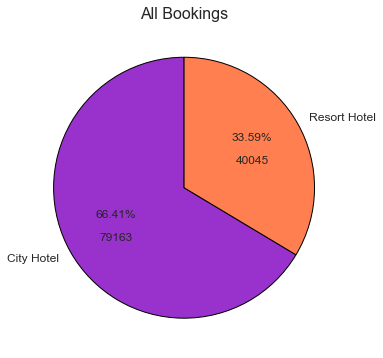

In [86]:
plt.subplots(figsize=(6,6))

labels = data['Hotel'].value_counts().index.tolist()
sizes = data['Hotel'].value_counts().tolist()

def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.2f}%\n\n{:d}".format(pct, absolute) 

plt.pie(sizes, 
        labels=labels, 
        colors=['DarkOrchid', 'Coral'], 
        autopct = lambda pct: func(pct, sizes),        
        startangle=90, 
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black" },
        textprops={'fontsize': 12})
plt.title("All Bookings", fontsize=16)
plt.show()

**Analise:**<br>
>The demand for City Hotel is significantly higher than Resort Hotel.<br>
>This chart contains canceled and non-canceled Bookings.

Next step we will work on non-canceled data. There is alot to discuss about canceled and non-canceled bookings, further on we will back to this topic.

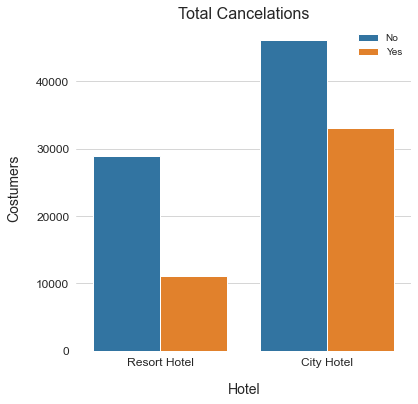

Non-Canceled Booking: 75010 
Canceled Booking: 44199


In [87]:
plt.subplots(figsize=(6,6))
sns.countplot(data=data, x = "Hotel", hue = 'Canceled')
plt.title("Total Cancelations", fontsize=16)
plt.xlabel("Hotel", labelpad=15, fontsize=14)
plt.ylabel("Costumers", labelpad=15, fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(ncol=1, loc="upper right", frameon=False)
sns.despine(left=True, bottom=True)
plt.show()

print("""Non-Canceled Booking: {} 
Canceled Booking: {}""".format(data['Canceled'].value_counts().No, data['Canceled'].value_counts().Yes))

2.1 <font size="3"> Avarage prices per person, per night along year</font>

In [88]:
rh = data.loc[(data["Hotel"] == "Resort Hotel") & (data["Canceled"] == 'No')]
ch = data.loc[(data["Hotel"] == "City Hotel") & (data["Canceled"] == 'No')]

data2["ADR per person"] = data2["ADR"] / (data2["Adults"] + data2["Children"])
rh["ADR per person"] = rh["ADR"] / (rh["Adults"] + rh["Children"])
ch["ADR per person"] = ch["ADR"] / (ch["Adults"] + ch["Children"])

In [89]:
print("""Avarage Price per person, per night in Resort Hotel: {:.2f} €
Avarage Price per person, per night in City Hotel: {:.2f} €""".format(rh['ADR per person'].mean(), ch['ADR per person'].mean()))

Avarage Price per person, per night in Resort Hotel: 47.49 €
Avarage Price per person, per night in City Hotel: 59.27 €


In [90]:
rh_month = rh.groupby(['Arriving Month'])['ADR per person'].mean().reset_index()
ch_month = ch.groupby(['Arriving Month'])['ADR per person'].mean().reset_index()

mean_prices_month = rh_month.merge(ch_month, on = 'Arriving Month')
mean_prices_month.columns = ['Arriving Month', 'Resort Hotel mean price (EUR)', 'City Hotel mean price (EUR)']
mean_prices_month

,Arriving Month,Resort Hotel mean price (EUR),City Hotel mean price (EUR)
0,April,43.73,58.72
1,August,83.32,57.77
2,December,37.67,47.72
3,February,30.85,50.95
4,January,31.17,51.28
5,July,70.26,57.26
6,June,56.35,66.34
7,March,34.12,52.48
8,May,42.25,69.99
9,November,30.00,57.14


As there is no native function that sorts columns by month written in full, we will have to either develop code that does this or import a library that contains this code.

In [91]:
#You need to verify your phone number and enable "Internet" option in settings, if you want to use on Kaggle

#!pip install sort-dataframeby-monthorweek
#!pip install sorted-months-weekdays

In [92]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

mean_prices_month = sort_month(mean_prices_month, 'Arriving Month')
data2 = sort_month(data2,'Arriving Month')
mean_prices_month

,Arriving Month,Resort Hotel mean price (EUR),City Hotel mean price (EUR)
0,January,31.17,51.28
1,February,30.85,50.95
2,March,34.12,52.48
3,April,43.73,58.72
4,May,42.25,69.99
5,June,56.35,66.34
6,July,70.26,57.26
7,August,83.32,57.77
8,September,50.37,67.04
9,October,35.14,61.80


In [93]:
data2 = sort_month(data2,'Arriving Month')

<function matplotlib.pyplot.show(close=None, block=None)>

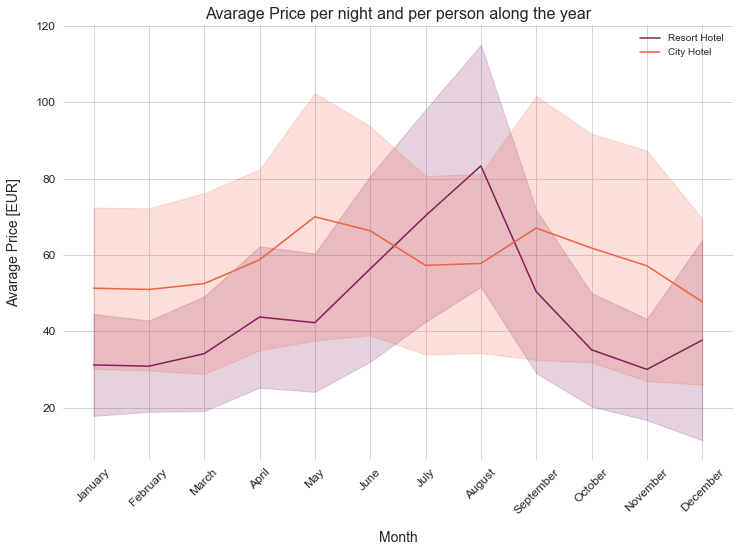

In [94]:
plt.subplots(figsize=(12,8))
sns.set_style("whitegrid")
sns.lineplot(data=data2, x="Arriving Month", y="ADR per person", hue="Hotel",ci="sd",palette= 'rocket')
plt.title("Avarage Price per night and per person along the year", fontsize=16)
plt.xlabel("Month", labelpad=15, fontsize=14)
plt.ylabel("Avarage Price [EUR]", labelpad=15, fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(ncol=1, loc="upper right", frameon=False)
sns.despine(left=True, bottom=True)
plt.show

**Analise**<br>

> City Hotel have higher average prices than Resort Hotels along the year, except in July and August (late spring/early summer, with means season and prices are highly correlated as we already know).<br>
The City Hotel prices per person are more stable compared to the City Hotel.<br>

2.2 <font size="3"> Avarage prices per person by year</font>

In [95]:
rh_year = rh.groupby(['Arriving Year'])['ADR per person'].mean().reset_index()
ch_year = ch.groupby(['Arriving Year'])['ADR per person'].mean().reset_index()

mean_prices_year = rh_year.merge(ch_year, on = 'Arriving Year')
mean_prices_year.columns = ['Year', 'Resort Hotel mean price (EUR)', 'City Hotel mean price (EUR)']
#mean_prices_y=mean_prices_y.style.hide_index()
mean_prices_year

,Year,Resort Hotel mean price (EUR),City Hotel mean price (EUR)
0,2015,46.45,54.21
1,2016,44.43,57.90
2,2017,52.77,63.70


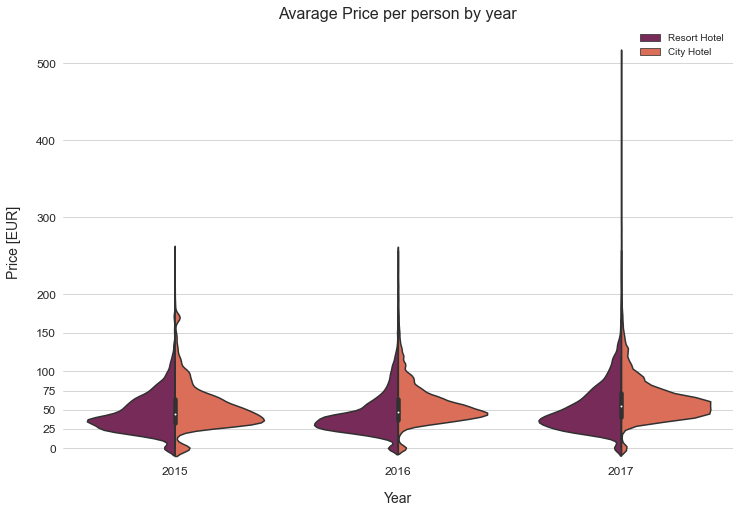

In [96]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.violinplot(data=data2, x="Arriving Year", y="ADR per person", hue="Hotel", split=True,palette= 'rocket')
plt.title("Avarage Price per person by year", fontsize=16)
plt.xlabel("Year", labelpad=15, fontsize=14)
plt.ylabel("Price [EUR]", labelpad=15, fontsize=14)
plt.xticks(fontsize=12)
plt.yticks([0,25,50,75, 100,150,200,300,400,500],fontsize=12)
plt.legend(ncol=1, loc="upper right", frameon=False)
plt.ylim(-15, 550)
sns.despine(left=True, bottom=True)
plt.show()

**Analise**

> City Hotel have higher average prices per year compared to Resort Hotel.<br><br>
> Crealry we have most common price around 40€ and 60€.
> Average prices per person around 175€ or higher can be considered atypical.<br><br>
> Prices per person equal to zero it's not so unusual.

2.3 <font size="3"> Avarage prices per person, per night and Room Type</font>

In [97]:
room_spent = data2[["Hotel", "Book Room Type", "ADR per person"]].sort_values("Book Room Type")
rh_room = rh.groupby(['Book Room Type'])['ADR per person'].mean().reset_index()
ch_room = ch.groupby(['Book Room Type'])['ADR per person'].mean().reset_index()


mean_prices_room= pd.concat([rh_room,ch_room],axis=1)
mean_prices_room.columns = ['Room', 'Resort Hotel mean price (EUR)','Room2', 'City Hotel mean price (EUR)']
mean_prices_room.drop('Room2',axis=1,inplace=True)
mean_prices_room

,Room,Resort Hotel mean price (EUR),City Hotel mean price (EUR)
0,A,43.19,58.49
1,B,52.33,43.60
2,C,50.55,46.56
3,D,50.77,62.77
4,E,55.76,74.55
5,F,63.38,55.61
6,G,54.71,61.59
7,H,52.73,NaN
8,L,76.38,NaN


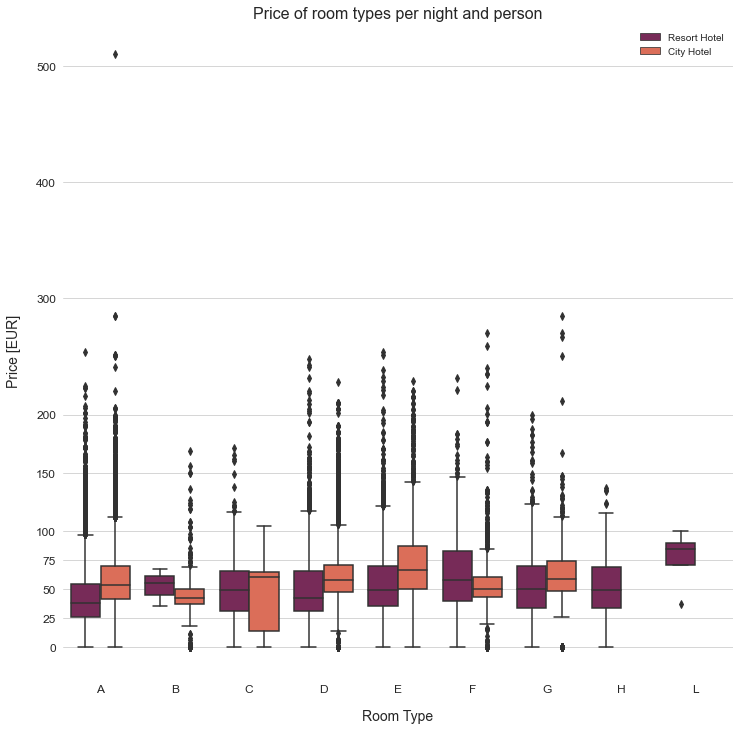

In [98]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=room_spent, x="Book Room Type", y="ADR per person", hue="Hotel", palette='rocket')
#,fliersize=0
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room Type", labelpad=15, fontsize=14)
plt.ylabel("Price [EUR]", labelpad=15, fontsize=14)
plt.xticks(fontsize=12)
plt.yticks([0,25,50,75, 100,150,200,300,400,500],fontsize=12)
plt.legend(ncol=1, loc="upper right", frameon=False)
sns.despine(left=True, bottom=True)
plt.show()

**Analise**

> City Hotel Room "B" have de lowest avarage price and Room "E" the highest avarage price.<br><br>
Resort Hotel Room "A" have de lowest avarage price and Room "L" the highest avarage price.<br><br>
There is no Room "H" and "L" for Resort Hotel.<br><br>
Although the rooms have the same name, they do not necessarily have the same characteristics.<br><br>
Although the rooms have the same name, they do not necessarily have the same characteristics.<br><br>
There are several outlier on this boxplot, regarding the price of the rooms, as we do not have more detailed information about the rooms or the transactions made by the guests, it is difficult to make a more accurate analysis.



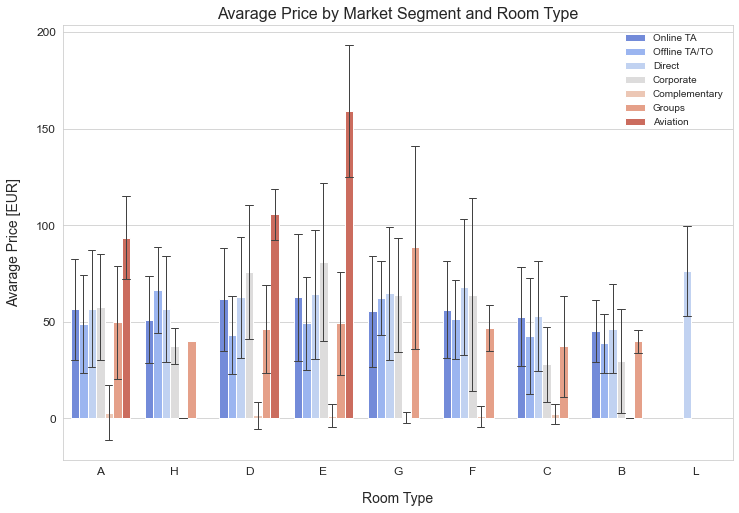

In [99]:
plt.figure(figsize=(12,8))
sns.barplot(data=data2, x="Book Room Type", y="ADR per person", hue="Segment",ci="sd", palette="coolwarm",errwidth=1, capsize=0.1)
plt.title("Avarage Price by Market Segment and Room Type", fontsize=16)
plt.xlabel("Room Type", labelpad=15, fontsize=14)
plt.ylabel("Avarage Price [EUR]", labelpad=15, fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(ncol=1, loc="upper right", frameon=False)
plt.show()

**Analise**

> Aviation segment spend more money on Rooms.<br><br>

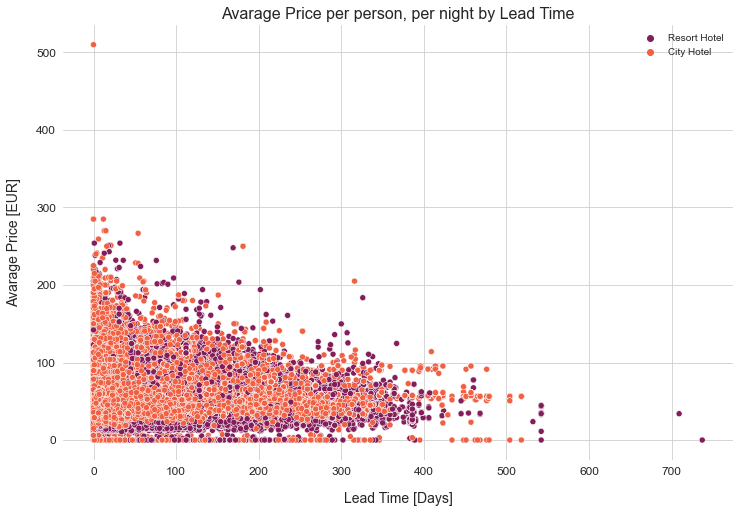

Avarage Lead Time: 80.08049593387548


In [100]:
plt.subplots(figsize=(12,8))
sns.scatterplot(data=data2, x= "Lead Time", y="ADR per person", hue = "Hotel", palette= 'rocket')
plt.title("Avarage Price per person, per night by Lead Time", fontsize=16)
plt.xlabel("Lead Time [Days]", labelpad=15, fontsize=14)
plt.ylabel("Avarage Price [EUR]", labelpad=15, fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(ncol=1, loc="upper right", frameon=False)
sns.despine(left=True, bottom=True)
plt.show()

print("Avarage Lead Time: {}".format(data2['Lead Time'].mean()))

**Analise**
> Avarage Lead Time: 80.08 days ( about 2.6 months).<br>
> We can't see a strong correlation between ADR per person and Lead Time.<br>

3. <font size="3"> Avarage Guests along the year</font>

In [101]:
guests=data2.groupby(['Hotel','Arriving Year','Arriving Month']).agg({'Arriving Month':len,'Adults':sum,'Children':sum,'Babies':sum})
guests.columns=['Guests','Adults','Children','Babies']
guests.reset_index(inplace=True)
guests.columns=['Hotel','Arriving Year','Arriving Month','Guests','Adults','Children','Babies']
guests = sort_month(guests,'Arriving Month')
guests

,Hotel,Arriving Year,Arriving Month,Guests,Adults,Children,Babies
0,City Hotel,2016,January,926,1518,45,16
1,City Hotel,2017,January,1323,2261,149,13
2,Resort Hotel,2016,January,765,1276,41,6
3,Resort Hotel,2017,January,1101,1786,65,10
4,City Hotel,2016,February,1436,2485,150,13
5,City Hotel,2017,February,1615,2884,174,17
6,Resort Hotel,2016,February,1113,1944,88,14
7,Resort Hotel,2017,February,1195,2122,124,14
8,City Hotel,2016,March,1933,3534,164,13
9,City Hotel,2017,March,2116,3823,85,15


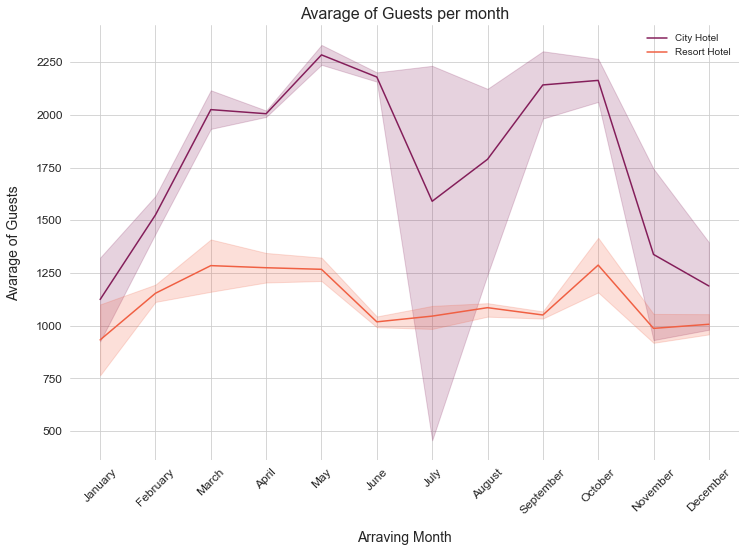

In [102]:
plt.subplots(figsize=(12,8))
sns.lineplot(data=guests, x="Arriving Month", y="Guests", hue="Hotel",palette= 'rocket')
plt.title("Avarage of Guests per month", fontsize=16)
plt.xlabel("Arraving Month", labelpad=15, fontsize=14)
plt.ylabel("Avarage of Guests", labelpad=15, fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)
plt.legend(ncol=1, loc="upper right", frameon=False)
sns.despine(left=True, bottom=True)
plt.show()

**Analise**

> The busiest periods for the City Hotel are between may and october<br>
The busiest periods of the resort hotel are little variable.<br>
July 2015 has a typically lower number of guests compared to other years, we can't know for sure the reason. As they refer to the first records may indicate the beginning of the a new computerized activities of this hotel.

3. <font size="3">Total Guets by Room Type</font>

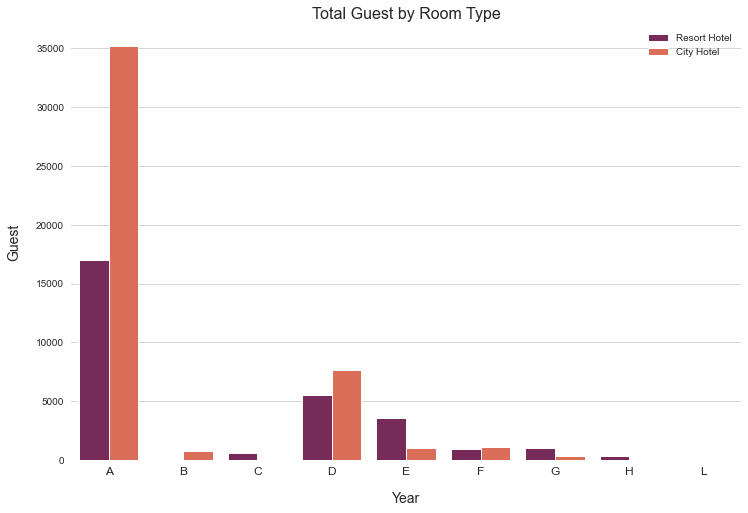

In [103]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.countplot(data=room_spent, x="Book Room Type",hue="Hotel", palette= 'rocket')
plt.title("Total Guest by Room Type", fontsize=16)
plt.xlabel("Year", labelpad=15, fontsize=14)
plt.ylabel("Guest", labelpad=15, fontsize=14)
plt.xticks(fontsize=12)
plt.legend(ncol=1, loc="upper right", frameon=False)
sns.despine(left=True, bottom=True)
plt.show()

**Analise**

> Room "A" is by far the most chosen room by guests.<br>
Surprisingly, the other rooms are not very chosen.

4. <font size="3"> Total Guets by Lenght Stay</font>

In [104]:
data2['Days Stay'] = data2['Weekend Stay'] + data2['Week Stay']
stay = data2.groupby(['Days Stay', 'Hotel']).agg({'Week Stay':len}).reset_index()
stay = stay.rename(columns={'Week Stay':'Total Days Stay'})
stay['Percentage of Guests'] = stay['Total Days Stay']*100 / stay['Total Days Stay'].sum()
stay.head(32)

,Days Stay,Hotel,Total Days Stay,Percentage of Guests
0,0,City Hotel,251,0.33
1,0,Resort Hotel,371,0.49
2,1,City Hotel,9155,12.21
3,1,Resort Hotel,6579,8.77
4,2,City Hotel,10983,14.64
5,2,Resort Hotel,4488,5.98
6,3,City Hotel,11889,15.85
7,3,Resort Hotel,3828,5.10
8,4,City Hotel,7694,10.26
9,4,Resort Hotel,3321,4.43


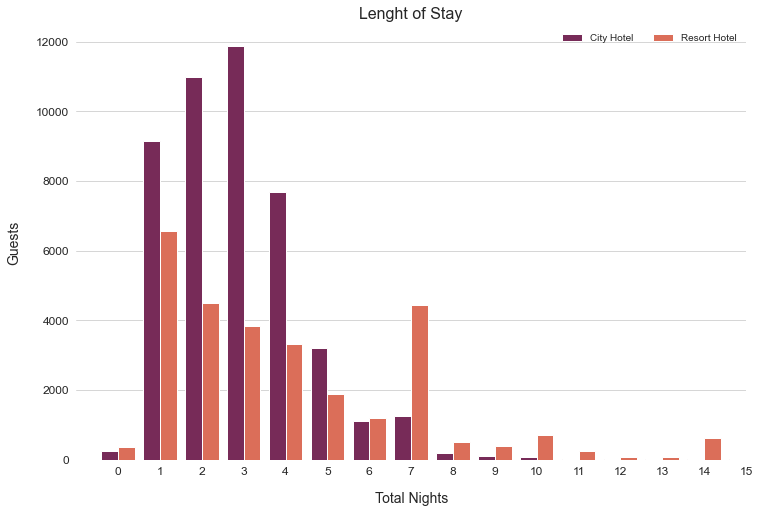

In [105]:
plt.subplots(figsize=(12,8))
sns.barplot(data=stay, x= "Days Stay",y = "Total Days Stay",hue="Hotel",dodge=True, palette= 'rocket')
plt.title("Lenght of Stay", fontsize=16)
plt.xlabel("Total Nights", labelpad=15, fontsize=14)
plt.ylabel("Guests", labelpad=15, fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(ncol=2, loc="upper right", frameon=False)
plt.xlim(-1,15)
sns.despine(left=True, bottom=True)
plt.show()

**Analise**

In City Hotel people use to stay around 1 to 4 days typicaly.<br>
In Resort Hotel people use to stay around 1 to 4 days typicaly, also 7 is another option (
weekly packages probably).<br>

3. <font size="3">Total Guets by Market Segment</font>

In [107]:
segments = data2.groupby(['Hotel', 'Segment']).count().iloc[:,:1]
segments = segments.rename(columns={'Canceled':'Counts'})
segments.reset_index(inplace=True)
segments.sort_values(by='Counts', ascending=False, inplace=True)
segments['Percentage'] = segments['Counts']*100 / segments['Counts'].sum()
segments

,Hotel,Segment,Counts,Percentage
6,City Hotel,Online TA,24192,32.25
12,Resort Hotel,Online TA,11481,15.31
5,City Hotel,Offline TA/TO,9546,12.73
11,Resort Hotel,Offline TA/TO,6334,8.44
9,Resort Hotel,Direct,5632,7.51
3,City Hotel,Direct,5016,6.69
4,City Hotel,Groups,4339,5.78
10,Resort Hotel,Groups,3357,4.48
2,City Hotel,Corporate,2337,3.12
8,Resort Hotel,Corporate,1954,2.60


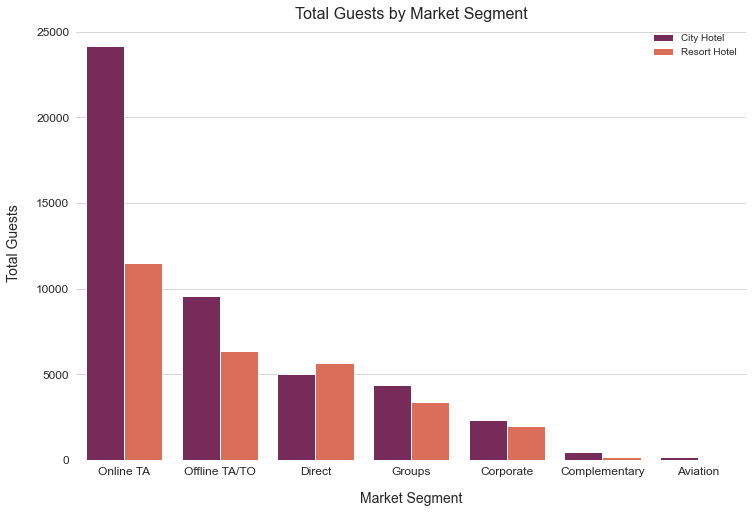

In [108]:
plt.subplots(figsize=(12,8))
sns.barplot(data=segments, x= "Segment",y = "Counts",hue="Hotel",dodge=True, palette= 'rocket')
plt.title("Total Guests by Market Segment", fontsize=16)
plt.xlabel("Market Segment", labelpad=15, fontsize=14)
plt.ylabel("Total Guests", labelpad=15, fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(ncol=1, loc="upper right", frameon=False)
sns.despine(left=True, bottom=True)
plt.show()

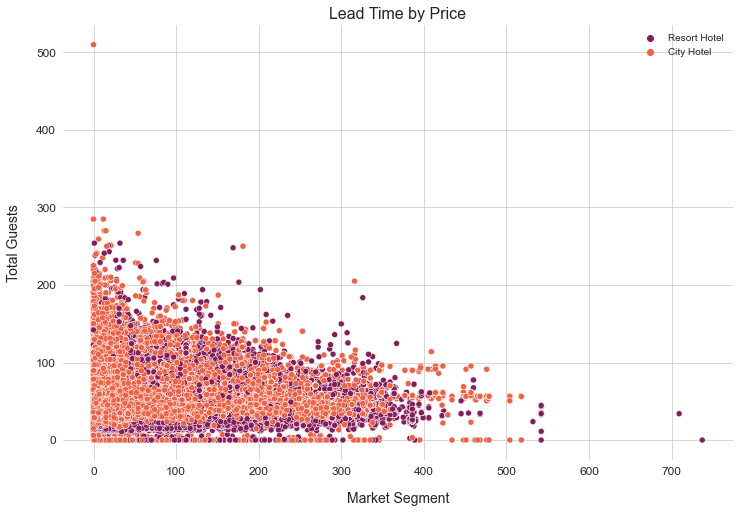

In [109]:
plt.subplots(figsize=(12,8))
sns.scatterplot(data=data2, x= "Lead Time", y="ADR per person", hue = "Hotel", palette= 'rocket')
plt.title("Lead Time by Price", fontsize=16)
plt.xlabel("Market Segment", labelpad=15, fontsize=14)
plt.ylabel("Total Guests", labelpad=15, fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(ncol=1, loc="upper right", frameon=False)
sns.despine(left=True, bottom=True)
plt.show()

In [110]:
country_5=data2['Country'].value_counts().iloc[:5]
country_n=data2['Country'].value_counts().iloc[5:].sum()
others=pd.Series( data=country_n, index=["Others"], name ="Country") 
country_resume = pd.concat([country_5, others])
country_resume

PRT       20977
GBR        9667
FRA        8468
ESP        6383
DEU        6067
Others    23448
Name: Country, dtype: int64

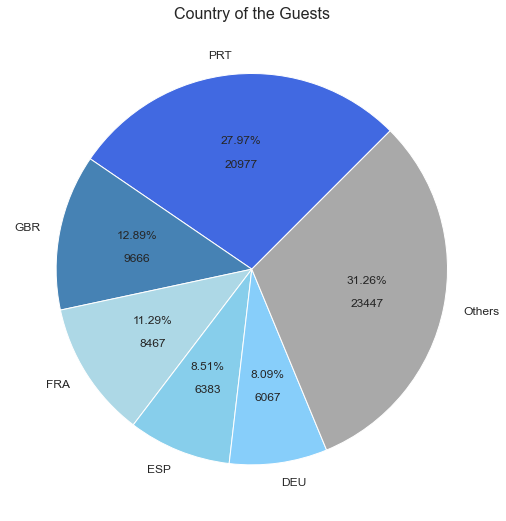

Total of Countries: 165


In [111]:
plt.subplots(figsize=(9,9))
labels = country_resume.index.tolist()
sizes = country_resume.tolist()
colors = ['RoyalBlue','SteelBlue', 'LightBlue','SkyBlue','LightSkyBlue','DarkGray' ]
plt.pie(sizes, 
        labels=labels,
        colors=colors,        
        autopct = lambda pct: func(pct, sizes),#autopct= '%1.2f%%',        
        startangle=45, 
        textprops={'fontsize': 12})
plt.title("Country of the Guests", fontsize=16)
plt.show()

print("Total of Countries:", data2['Country'].nunique()-1)

# Conclusion

Resort Hotel and City Hotel have different perspectives regarding their guests and prices according to the season, as can be seen in the extracted charts and tables. Understanding these graphs and tables and others that can be generated is part of a good business strategy, which is fundamental for the growth of any hotel business.

Personally, before studying this dataset, I could not imagine that the cancellation rate of bookins was so high and this is certainly very problematic for hotels.I plan to make a machine learning model in the future to preview these cancellations. But for now I will be updating this notebook just for data analysis.

I'm not that experienced in this area, also this is the first time I post something on kaggle platform, so any code suggestion or more optimized changes, as well as ideas for this notebook are welcome.